In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("D:/monthly-beer-production-in-austr.csv", parse_dates=['Month'], index_col='Month')
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [5]:
df.isna().sum()

Monthly beer production    0
dtype: int64

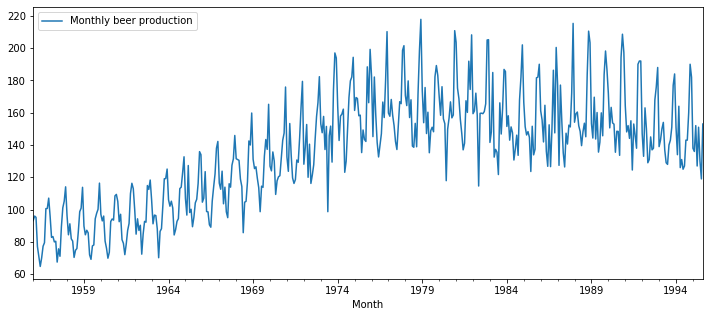

In [16]:
df['Monthly beer production'].plot(figsize=(12, 5), legend=True)
plt.show()

In [18]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(df['Monthly beer production'])

print('ADF : ', adf[0])
print('P-value : ', adf[1])

for key, value in adf[4].items():
    print(f'{key} : {value}')

ADF :  -2.2826614187875807
P-value :  0.17762099829132377
1% : -3.4447087976702284
5% : -2.867871300049488
10% : -2.5701423432047443


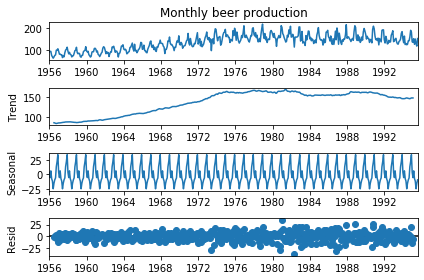

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(df['Monthly beer production'])
decomposed.plot();

In [36]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(df['Monthly beer production'], trace=True, suppress_warnings=True, m=12, seasonal=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=3556.032, Time=2.52 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4180.337, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3905.859, Time=0.40 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3940.279, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4178.356, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=3897.413, Time=1.06 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=1.75 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=3553.898, Time=5.35 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=3645.528, Time=3.12 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=5.71 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=3553.456, Time=4.43 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=3810.481, Time=1.91 sec
 ARIMA(1,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=4.21 sec
 ARIMA(2,1,1)(1,0,2)[12] intercept   : AIC=3562.824, Time=4.00 sec
 ARIMA(3,1,2)(1,0,2)[12] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  476
Model:             SARIMAX(3, 1, 5)x(1, 0, [1, 2], 12)   Log Likelihood               -1724.576
Date:                                 Fri, 07 May 2021   AIC                           3473.151
Time:                                         15:12:03   BIC                           3523.111
Sample:                                              0   HQIC                          3492.798
                                                 - 476                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3496      0.050     -7.035      0.000      -0.447      -0.252
ar.L2         -0.0716      0.057     -1.247      0.212      -0.184       0.041
ar.L3          0.7965      0.050     15.937      0.000       0.699       0.894
ma.L1         -0.6420      0.057    -11.225      0.000      -0.754      -0.530
ma.L2         -0.2887      0.040     -7.216      0.000      -0.367      -0.210
ma.L3         -0.8046      0.028    -28.873      0.000      -0.859      -0.750
ma.L4          0.7819      0.053     14.866      0.000       0.679       0.885
ma.L5          0.1036      0.044      2.350      0.019       0.017       0.190
ar.S.L12       0.9944      0.004    221.135      0.000       0.986       1.003
ma.S.L12      -0.8718      0.048    -18.177      0.000      -0.966      -0.778
ma.S.L24       0.0578      0.049      1.189      0.234      -0.037       0.153
sigma2        79.2207      4.372     18.120      0.000      70.652      87.790
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                72.47
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               2.87   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
size = int(len(df) * 0.7)
x_train, x_test = df[0:size], df[size:len(df)]
x_train.shape, x_test.shape

((333, 1), (143, 1))

In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(x_train['Monthly beer production'], order=(3, 1, 5), seasonal_order=(1, 0, 2, 12))
fit_model = model.fit()
fit_model.summary()

C:\Users\ANUJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ANUJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ANUJ\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                 Monthly beer production   No. Observations:                  333
Model:             SARIMAX(3, 1, 5)x(1, 0, [1, 2], 12)   Log Likelihood               -1200.524
Date:                                 Fri, 07 May 2021   AIC                           2425.047
Time:                                         15:15:44   BIC                           2470.709
Sample:                                     01-01-1956   HQIC                          2443.257
                                          - 09-01-1983                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3868      0.056     -6.907      0.000      -0.497      -0.277
ar.L2         -0.1209      0.065     -1.873      0.061      -0.247       0.006
ar.L3          0.7534      0.056     13.470      0.000       0.644       0.863
ma.L1         -0.5698      0.065     -8.813      0.000      -0.697      -0.443
ma.L2         -0.3320      0.044     -7.585      0.000      -0.418      -0.246
ma.L3         -0.8399      0.029    -29.325      0.000      -0.896      -0.784
ma.L4          0.7291      0.063     11.574      0.000       0.606       0.853
ma.L5          0.1948      0.051      3.811      0.000       0.095       0.295
ar.S.L12       0.9923      0.007    150.475      0.000       0.979       1.005
ma.S.L12      -0.8888      0.056    -15.840      0.000      -0.999      -0.779
ma.S.L24       0.1106      0.058      1.916      0.055      -0.003       0.224
sigma2        71.9398      4.349     16.540      0.000      63.415      80.464
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):               125.99
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               4.55   Skew:                            -0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

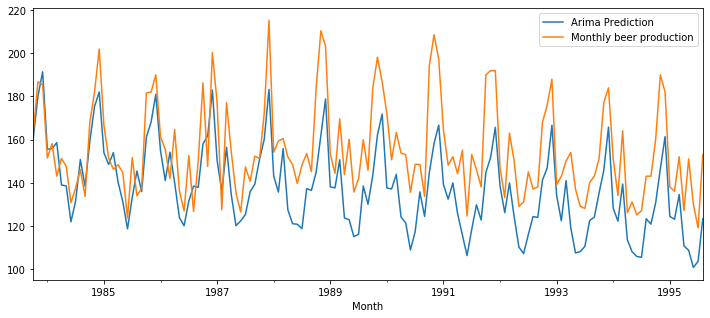

In [40]:
starts = len(x_train)
ends = len(x_train) + len(x_test)-1

pred = fit_model.predict(start=starts, end=ends).rename('Arima Prediction')
# pred.index = df.index[starts : ends+1]

plt.figure(figsize=(12, 5))
pred.plot(legend=True) 
x_test['Monthly beer production'].plot(legend=True)
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(x_test['Monthly beer production'], pred))
error , x_test['Monthly beer production'].mean()

(21.95633921457669, 155.03216783216783)

In [42]:
model2 = SARIMAX(df['Monthly beer production'], order=(3, 1, 5), seasonal_order=(1, 0, 2, 12))
fit_model2 = model2.fit()
fit_model2.summary()

C:\Users\ANUJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ANUJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ANUJ\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                 Monthly beer production   No. Observations:                  476
Model:             SARIMAX(3, 1, 5)x(1, 0, [1, 2], 12)   Log Likelihood               -1724.576
Date:                                 Fri, 07 May 2021   AIC                           3473.151
Time:                                         15:18:44   BIC                           3523.111
Sample:                                     01-01-1956   HQIC                          3492.798
                                          - 08-01-1995                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3496      0.050     -7.035      0.000      -0.447      -0.252
ar.L2         -0.0716      0.057     -1.247      0.212      -0.184       0.041
ar.L3          0.7965      0.050     15.937      0.000       0.699       0.894
ma.L1         -0.6420      0.057    -11.225      0.000      -0.754      -0.530
ma.L2         -0.2887      0.040     -7.216      0.000      -0.367      -0.210
ma.L3         -0.8046      0.028    -28.873      0.000      -0.859      -0.750
ma.L4          0.7819      0.053     14.866      0.000       0.679       0.885
ma.L5          0.1036      0.044      2.350      0.019       0.017       0.190
ar.S.L12       0.9944      0.004    221.135      0.000       0.986       1.003
ma.S.L12      -0.8718      0.048    -18.177      0.000      -0.966      -0.778
ma.S.L24       0.0578      0.049      1.189      0.234      -0.037       0.153
sigma2        79.2207      4.372     18.120      0.000      70.652      87.790
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                72.47
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               2.87   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
forecast = fit_model2.predict(start=len(df), end=(len(df)-1)+5*12).rename('Forecast')
forecast[:5]

1995-09-01    130.258685
1995-10-01    161.732665
1995-11-01    184.930783
1995-12-01    177.126004
1996-01-01    147.227038
Freq: MS, Name: Forecast, dtype: float64

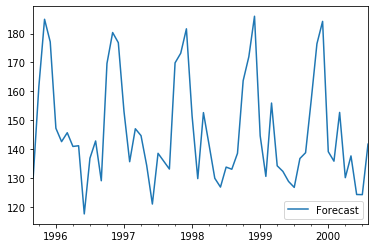

In [55]:
forecast.plot(legend=True)
plt.show()

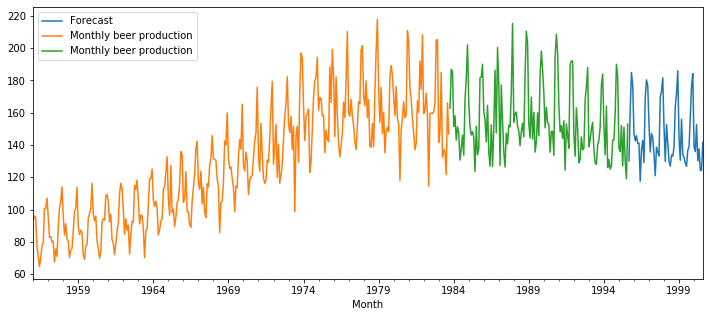

In [51]:
forecast.plot(legend=True, figsize=(12, 5))
x_train['Monthly beer production'].plot(legend=True)
x_test['Monthly beer production'].plot(legend=True)
plt.show()